In [1]:
import supy as sp
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from gr_recalc import gr_recalc

In [2]:
# Sätt Path till runcontrol. Flera runcontrol kan användas om du t.ex. har olika forcing data.
#path_runcontrol = "/Users/juliacederbrant/Handledning_Julia/RunControl.nml"
path_runcontrol = "/Volumes/NO NAME/masterarbete/SuPy/input_data/RunControl.nml"
path_runcontrol

siteselect = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/SUEWS_SiteSelect.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 1,
        index_col=0,)

#siteselect

# Ladda in inställningarna i runcontrol och SiteSelect i SuPy som en DataFrame
df_state_init = sp.init_supy(path_runcontrol)

#df_state_init.loc[1]

# Grid df_state_init, se ovan. Fler Grids kan användas
grid = df_state_init.index[0] 


forcing_2017 = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/Kb_2017_data_60.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 0,
        index_col=0)

#forcing_2018

forcing_2018 = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/Kb_2018_data_60.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 0,
        index_col=0)

#forcing_2018

#sp.load_forcing_grid sätter Datetime som index på forcing data, samst läser in all forcing data!

df_forcing = sp.load_forcing_grid(path_runcontrol, grid)

#sp.check för kolla så att forcing funkar
sp.check_forcing(df_forcing)
#df_forcing

2021-03-18 09:57:56,174 - SuPy - INFO - All cache cleared.
2021-03-18 09:57:59,532 - SuPy - INFO - All cache cleared.
2021-03-18 09:58:04,236 - SuPy - INFO - SuPy is validating `df_forcing`...
2021-03-18 09:58:12,481 - SuPy - INFO - All checks for `df_forcing` passed!


In [15]:
df_state_init = sp.init_supy(path_runcontrol)
df_forcing = sp.load_forcing_grid(path_runcontrol, 1)

base_garden = df_state_init.copy().loc[1] # Base scenario 0% Rain garden
rain_garden= df_state_init.copy().loc[3] # Rain Garden scenario 100%

## Scenario 75% raingarden
df_state_init.loc[4] = rain_garden.copy()
df_state_init.loc[4] = gr_recalc(df_state_init.loc[4], base_garden, rain_garden, .25, .75)

## Scenario 50% raingarden
df_state_init.loc[5] = rain_garden.copy()
df_state_init.loc[5] = gr_recalc(df_state_init.loc[5], base_garden, rain_garden, .50, .50)

## Scenario 25% raingarden
df_state_init.loc[6] = rain_garden.copy()
df_state_init.loc[6] = gr_recalc(df_state_init.loc[6], base_garden, rain_garden, .75, .25)

## Scenario 10% raingarden
df_state_init.loc[7]= rain_garden.copy()
df_state_init.loc[7] = gr_recalc(df_state_init.loc[7], base_garden, rain_garden, .90, .10)

2021-03-18 10:09:44,094 - SuPy - INFO - All cache cleared.
2021-03-18 10:09:46,941 - SuPy - INFO - All cache cleared.


In [32]:
#df_output, df_state_final = sp.run_supy(df_forcing, df_state_init)

base    = df_output.loc[1] # 0% Rain Garden
rg_100  = df_output.loc[3] # 100% Rain Garden
rg_75   = df_output.loc[4] # 75% Rain Garden
rg_50   = df_output.loc[5] # 50% Rain Garden
rg_25   = df_output.loc[6] # 25% Rain Garden
rg_10   = df_output.loc[7] # 10% Rain Garden

df_output_merge_x=pd.concat([base, rg_100, rg_75, rg_50, rg_25, rg_10],axis=1,join='inner',keys=['base','rg_100','rg_75','rg_50','rg_25','rg_10']).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1)

df_merge = df_output_merge_x.SUEWS

<AxesSubplot:xlabel='datetime'>

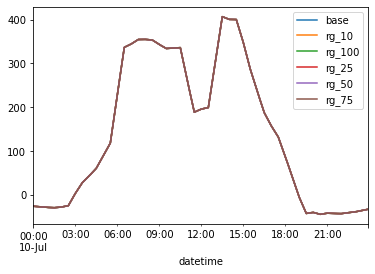

In [33]:
s = '2018 07 10'
e = '2018 07 10'

df_merge.loc[s:e, 'QN'].plot()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='da973e86-4ddb-4304-81ad-6e2ad343ec12'>)

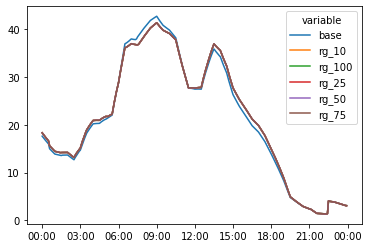

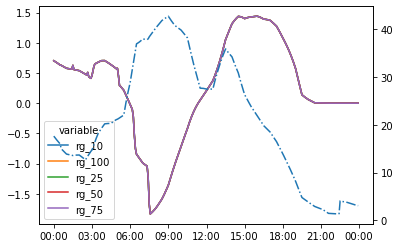

In [34]:
sp.util.plot_day_clm(df_merge.loc[s:e, 'QE'])
sp.util.plot_day_clm(df_merge.loc[s:e, 'QE'], show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='2d255eb5-43c9-4bff-86dc-bdc7d8c4e3ef'>)

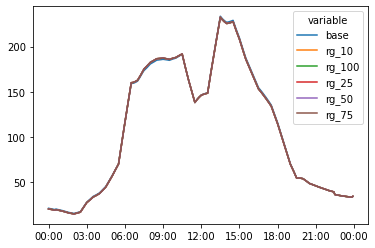

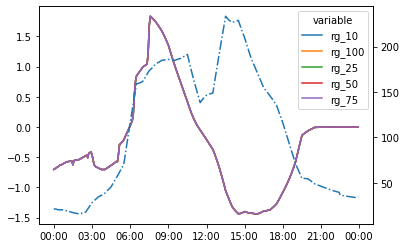

In [35]:
sp.util.plot_day_clm(df_merge.loc[s:e, 'QH'])
sp.util.plot_day_clm(df_merge.loc[s:e, 'QH'], show_dif =True, col_ref =('base'))

<AxesSubplot:xlabel='datetime'>

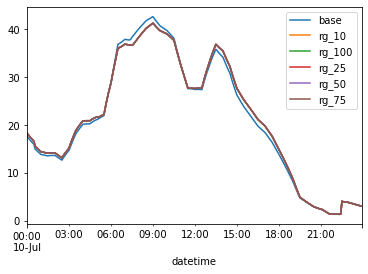

In [36]:
df_merge.loc[s:e, 'QE'].plot()

<AxesSubplot:xlabel='datetime'>

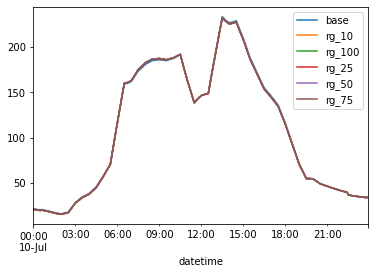

In [37]:
df_merge.loc[s:e, 'QH'].plot()

<AxesSubplot:xlabel='datetime'>

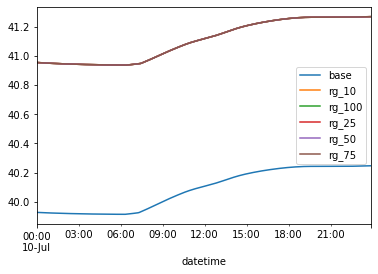

In [38]:
df_merge.loc[s:e, 'SMD'].plot()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='337c70a0-1ab2-43e1-9c87-702693e63133'>)

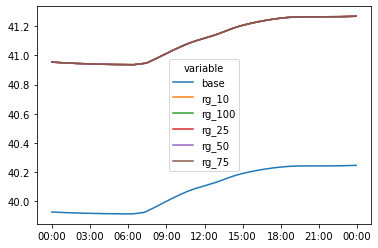

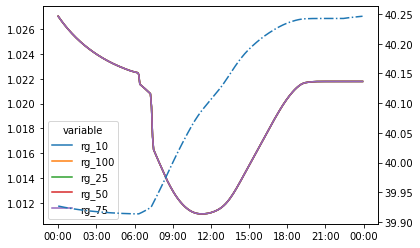

In [39]:
sp.util.plot_day_clm(df_merge.loc[s:e, 'SMD'])
sp.util.plot_day_clm(df_merge.loc[s:e, 'SMD'], show_dif =True, col_ref =('base'))